<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/Logistic_Regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Library
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


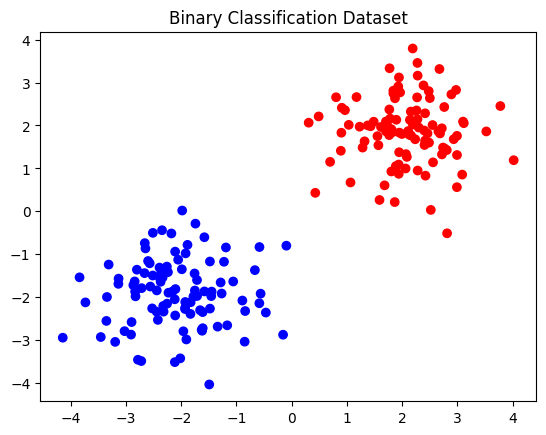

In [2]:
n_samples = 100

# Class 0: centered at (-2, -2)
x0 = torch.randn(n_samples, 2) * 0.75 - 2
y0 = torch.zeros(n_samples, 1)

# Class 1: centered at (2, 2)
x1 = torch.randn(n_samples, 2) * 0.75 + 2
y1 = torch.ones(n_samples, 1)

# Combine
X = torch.cat([x0, x1], dim=0)
y = torch.cat([y0, y1], dim=0)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="bwr")
plt.title("Binary Classification Dataset")
plt.show()


In [3]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  # 2 input features → 1 output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Output between 0 and 1

model = LogisticRegressionModel()


In [4]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [5]:
epochs = 100

for epoch in range(epochs):
    model.train()

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 0.1727
Epoch 20, Loss: 0.0925
Epoch 30, Loss: 0.0649
Epoch 40, Loss: 0.0507
Epoch 50, Loss: 0.0420
Epoch 60, Loss: 0.0361
Epoch 70, Loss: 0.0318
Epoch 80, Loss: 0.0285
Epoch 90, Loss: 0.0259
Epoch 100, Loss: 0.0238


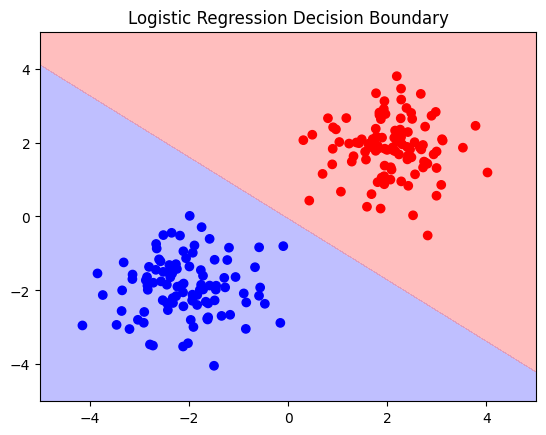

In [6]:
# Generate grid for plotting
xx, yy = torch.meshgrid(torch.linspace(-5, 5, 100), torch.linspace(-5, 5, 100), indexing='xy')
grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
with torch.no_grad():
    probs = model(grid).reshape(100, 100)

# Plot
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.5, cmap="bwr")
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="bwr")
plt.title("Logistic Regression Decision Boundary")
plt.show()
